In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd #used only for pretty dataframe tables

### Input Data Processing

In [2]:
def count_occurrence(arr):
    unique_elements, counts = np.unique(arr, return_counts=True)
    for element, count in zip(unique_elements, counts):
        print(f"{element} = {count}")

Load data as txt.

In [3]:
arr_feature = np.loadtxt("AI201_PA3_Data/data.csv", delimiter=",", dtype=float)
arr_label = np.loadtxt("AI201_PA3_Data/data_labels.csv", delimiter=",", dtype=int)
arr_label = arr_label.reshape(-1,1)
arr_test = np.loadtxt("AI201_PA3_Data/test_set.csv", delimiter=",", dtype=float)

Check shape of data.

In [4]:
print(f'Data Shape: {arr_feature.shape} \n {arr_feature}\n')
print(f'Data Label Shape: {arr_label.shape} \n {arr_label}\n')
print(f'Test Shape: {arr_test.shape} \n {arr_test}')

Data Shape: (3486, 354) 
 [[1.9951e-03 5.5609e-04 2.2746e-04 ... 2.9060e-02 8.9974e-01 2.0173e-01]
 [3.4239e-02 1.4877e-02 1.1704e-03 ... 1.6280e-03 9.2344e-01 7.7261e-02]
 [8.1960e-02 1.6779e-02 0.0000e+00 ... 4.0561e-02 6.1178e-01 2.2847e-01]
 ...
 [9.4118e-02 2.4685e-02 0.0000e+00 ... 6.0149e-02 6.3352e-01 2.9197e-01]
 [4.1271e-03 3.9431e-03 0.0000e+00 ... 1.9744e-03 8.7334e-01 1.8243e-01]
 [3.2514e-02 2.3991e-02 0.0000e+00 ... 5.1001e-03 8.8669e-01 1.1285e-01]]

Data Label Shape: (3486, 1) 
 [[8]
 [5]
 [1]
 ...
 [1]
 [4]
 [1]]

Test Shape: (701, 354) 
 [[2.2071e-02 1.5208e-02 0.0000e+00 ... 4.9787e-03 9.8536e-01 6.6436e-02]
 [2.7050e-02 1.4022e-02 8.7247e-04 ... 2.5246e-02 9.0283e-01 2.7611e-01]
 [4.0489e-02 2.9229e-02 1.7990e-03 ... 1.0859e-02 9.2096e-01 2.6831e-01]
 ...
 [1.6607e-02 2.0379e-02 5.2598e-04 ... 4.4773e-03 9.8416e-01 8.9833e-02]
 [5.6162e-03 5.2749e-03 0.0000e+00 ... 7.8382e-03 9.7868e-01 1.4204e-01]
 [1.1618e-02 1.1367e-02 1.9311e-04 ... 9.4570e-03 8.8809e-01 2.1509

Data is imbalanced.

In [5]:
count_occurrence(arr_label)

1 = 1625
2 = 233
3 = 30
4 = 483
5 = 287
6 = 310
7 = 52
8 = 466


Perform SMOTE. Reference used: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [6]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over_strategy = {2:500, 3:500, 4:500, 5:500, 6:500, 7:500, 8:500}
under_strategy = {1:500}

over = SMOTE(sampling_strategy=over_strategy, random_state = 0)
under = RandomUnderSampler(sampling_strategy=under_strategy, random_state = 0)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

data_x, data_y = pipeline.fit_resample(arr_feature, arr_label)
data_y = data_y.reshape(-1, 1)

Check shape of data.

In [7]:
print(f'X Data Shape: {data_x.shape} \n {data_x}\n')
print(f'Y Data Shape: {data_y.shape} \n {data_y}\n')

X Data Shape: (4000, 354) 
 [[1.18520000e-01 3.94020000e-02 0.00000000e+00 ... 0.00000000e+00
  8.36520000e-01 1.69970000e-01]
 [2.98150000e-02 1.40180000e-02 0.00000000e+00 ... 9.75020000e-03
  8.61420000e-01 1.06610000e-01]
 [3.70510000e-02 1.01420000e-02 1.98160000e-03 ... 8.92830000e-03
  9.12770000e-01 6.76960000e-02]
 ...
 [2.61624071e-02 5.31708236e-03 2.85624510e-05 ... 3.07675137e-02
  8.15834524e-01 3.39269262e-01]
 [7.59213307e-03 1.87944192e-02 0.00000000e+00 ... 3.62446145e-03
  7.41501990e-01 9.65843530e-02]
 [8.16098121e-03 3.98083252e-03 0.00000000e+00 ... 7.76216127e-05
  9.94005978e-01 3.59975343e-02]]

Y Data Shape: (4000, 1) 
 [[1]
 [1]
 [1]
 ...
 [8]
 [8]
 [8]]



Randomly partition the balanced dataset you	made into a training set and validation set:
- training_set.csv
- training_labels.csv
- validation_set.csv - exactly 800 samples
- validation_labels.csv

In [8]:
data = np.append(data_y, data_x, axis=1)
row, col = data.shape # row: 4000 inputs; col: 354 feature, 1 class
index_data = np.arange(row)
mask_data = np.zeros_like(index_data, dtype=bool)
rand_index = np.random.choice(index_data, round(0.8*row), replace=False) # Choose random index as train
mask_data[rand_index] = True

train = data[mask_data]
test = data[~mask_data]

train_x = train[:,1:]
train_y = train[:,0]
labels = set(train_y)
train_y = train_y.reshape(-1, 1).astype(int)

test_x = test[:,1:]
test_y = test[:,0].reshape(-1, 1).astype(int)

Check shape and balance of classes.

In [9]:
print(f'Train X: {train_x.shape}')
print(f'Train Y: {train_y.shape}')
count_occurrence(train_y)
print(f'Test X: {test_x.shape}')
print(f'Test Y: {test_y.shape}')
count_occurrence(test_y)

Train X: (3200, 354)
Train Y: (3200, 1)
1 = 406
2 = 412
3 = 406
4 = 398
5 = 408
6 = 389
7 = 391
8 = 390
Test X: (800, 354)
Test Y: (800, 1)
1 = 94
2 = 88
3 = 94
4 = 102
5 = 92
6 = 111
7 = 109
8 = 110


Save training and validation sets

In [10]:
np.savetxt('training_set.csv', train_x)
np.savetxt('training_labels.csv', train_y)
np.savetxt('validation_set.csv', test_x)
np.savetxt('validateion_labels.csv', test_y)

### Training Data

Simple Functions

In [11]:
def convert_class(error):
    probs_ = np.copy(error)
    probs_[probs_ > 0.5] = 1
    probs_[probs_ <= 0.5] = 0
    return probs_

def one_hot_encoder(value):
    temp_list = [0]*8
    temp_list[int(value)-1] = 1
    return temp_list

def one_hot_encoder_list(input_list):
    output_list = []

    for value in input_list:
        temp_list = one_hot_encoder(value)
        output_list.append(temp_list)
    output_array = np.array(output_list)
    return output_array

def labelling(predicted):
    return np.argmax(predicted) + 1

def networkA_change_nodes(dim_in, dim_out, x1, x2):
    dict_network_A = [
        {'dim_in': dim_in, 'dim_out': x1,      'activation': 'tanh', 'activation_params': [1.716, 2/3]},
        {'dim_in': x1,     'dim_out': x2,      'activation': 'tanh', 'activation_params': [1.716, 2/3]},
        {'dim_in': x2,     'dim_out': dim_out, 'activation': 'logi', 'activation_params': [2.0]}]
    return dict_network_A

def networkB_change_nodes(dim_in, dim_out, x1, x2):
    dict_network_B = [
        {'dim_in': dim_in, 'dim_out': x1,      'activation': 'relu', 'activation_params': [0.01]},
        {'dim_in': x1,     'dim_out': x2,      'activation': 'relu', 'activation_params': [0.01]},
        {'dim_in': x2,     'dim_out': dim_out, 'activation': 'logi', 'activation_params': [2.0]}]
    return dict_network_B

Main Functions

In [12]:
def initialize(dict_network, seed = 99):
    '''
    INPUT: a list of dictionaries representing the network architecture
           Each dictionary contains the specifications of a layer
           Dictionary Keys:
               dim_in  - number of input nodes
               dim_out - number of output nodes
               activation - activation function
               activation_params - activation function parameters
    OUTPUT: same list of dictionaries but with additional keys for weights, biases, and previous weight and bias updates 
           Initialized Dictionary Keys:
               weight - uniform random distribution between -1 and 1
               bias - uniform random distribution between -1 and 1
               prev_delta_weight - zero matrix
               prev_delta_bias - zero matrix
    '''
    
    np.random.seed(seed)
    
    for dict_layer in dict_network:        
        
        dim_layer_in = dict_layer['dim_in'] 
        dim_layer_out = dict_layer['dim_out']  
        
        dict_layer['weight'] = np.random.uniform(-1, 1, (dim_layer_out, dim_layer_in))
        dict_layer['bias'] = np.random.uniform(-1, 1, (dim_layer_out, 1))
        dict_layer['prev_delta_weight'] = np.zeros((dim_layer_out, dim_layer_in))
        dict_layer['prev_delta_bias'] = np.zeros((dim_layer_out,1))
        
    return dict_network

In [13]:
def forward_propagation(input_data, dict_network):
    '''
    INPUT: input data and a list of dictionaries representing the network architecture
    OUTPUT: same list of dictionaries but with additional keys for the input, output, and v values 
            Added Dictionary Keys:
               input - output of the previous layer or the input data for the first layer
               v - linear combination of the input value, the weight matrix, and the bias vector
               output - applying the activation function to the v value
    '''
    curr_in = input_data
    
    for dict_layer in dict_network:

        activation = dict_layer['activation']
        activation_params = dict_layer['activation_params']
        weight = dict_layer['weight']
        bias = dict_layer['bias'].T.flatten()

        prev_in = curr_in
        dict_layer['input'] = prev_in 
        
        v = np.dot(weight, prev_in) + bias

        if len(activation_params) == 0:
            raise Exception('Activation parameter is empty.')
            
        elif activation == 'logi':
            a = activation_params[0]
            curr_in = 1 / (1 + np.exp(-a*v))
            
        elif activation == 'tanh':
            a = activation_params[0]
            b = activation_params[1]
            curr_in = a * np.tanh(b*v)
            
        elif activation == 'relu':
            a = activation_params[0]
            curr_in = np.maximum(v,a*v)
            
        else:
            raise Exception('Activation function is not supported')
            
        dict_layer['output'] = curr_in
        dict_layer['v'] = v

    return dict_network

In [14]:
def backward_propagation(output_data, dict_network, learning_rate=0.85):
    '''
    INPUT: output data, the list of dictionaries representing the network architecture, and the learning rate
    OUTPUT: same list of dictionaries but with additional keys for delta, delta_weight, and delta_bias values
            Added dictionary keys:
                delta_value - error signal that propagated from the output layer to the input layer
                delta_weight - weight update for each layer 
                delta_bias - bias update for each layer
    '''
    d = output_data    
    o = dict_network[-1]['output'] #o = convert_class(o)
    error = d - o
    
    for index, dict_layer in reversed(list(enumerate(dict_network))):
        
        output = dict_layer['output']
        activation = dict_layer['activation']
        activation_params = dict_layer['activation_params']
        curr_input = dict_layer['input']
        v = dict_layer['v']
        weight = dict_layer['weight']

        if len(activation_params) == 0:
            raise Exception('Activation parameter is empty.') 
            
        elif activation == 'logi':
            a = activation_params[0]
            delta =  a * error * output * (1-output)

        elif activation == 'tanh':
            a = activation_params[0]
            b = activation_params[1]
            delta = (b / a) * error * (a - output) * (a + output)

        elif activation == 'relu':
            a = activation_params[0]
            mult = np.where(v > 0, 1, a)
            delta = mult * error

        else:
            raise Exception('Activation function is not supported')
        
        dict_layer['delta'] = delta
        delta_weight = learning_rate * np.outer(delta,curr_input)
        dict_layer['delta_weight'] = delta_weight
        delta_bias = learning_rate * delta
        dict_layer['delta_bias'] = delta_bias
        
        error = np.dot(delta, weight)
    
    error = d - o
    
    return dict_network, error

In [15]:
def update_weights(init_dict_network, update_dict_network, delta_weights, delta_biases, momentum):
    
    '''
     INPUT: initial list of dictionaries, updated list of dictionaries, delta_weights, delta_biases, and momentum
     OUTPUT: new list of dictionaries with updated weights and biases for each layer. 
             Updated dictionary keys:
             weight update - sum of delta_weight and momentum times previous weight update
             bias update - sum of delta_bias and momentum times previous bias update 
    '''
    for index, dict_layer in enumerate(update_dict_network):
        
        curr_weight = dict_layer['weight']
        curr_bias = dict_layer['bias']
        
        prev_delta_weight = dict_layer['prev_delta_weight']
        prev_delta_bias = dict_layer['prev_delta_bias']
        
        delta_weight = np.array(delta_weights[index])
        delta_bias = np.array(delta_biases[index])
        delta_bias = delta_bias.reshape(-1,1)

        update_bias = curr_bias + momentum * prev_delta_bias + delta_bias
        update_weight = curr_weight + momentum * prev_delta_weight + delta_weight

        init_dict_network[index]['weight'] = update_weight
        init_dict_network[index]['bias'] = update_bias
        
        init_dict_network[index]['prev_delta_weight'] = delta_weight
        init_dict_network[index]['prev_delta_bias'] = delta_bias
        
    return init_dict_network

In [16]:
def train_mlp(dict_network, arr_train, arr_val, momentum, learning_rate, epochs, per_epoch=5, mini_batch_size=8, seed=99):
    '''
    Performs forward and backward propagation on training set and validation set
    '''
    init_dict_network = dict_network
    upd_dict_network = initialize(dict_network, seed)
    
    epoch_1 = [x + 1 for x in range(epochs)]
    epoch_x = []
    
    sqr_error_per_epoch = []
    sqr_error_per_xepoch_train = []
    sqr_error_per_xepoch_val = []
    
    dict_predicted_train = {}
    dict_predicted_val = {}
    dict_true_val = {}
    dict_true_train = {}
    
    for epoch in epoch_1:
        key = f'epoch_{epoch}'
        sse_error = 0
        sse_error_val = 0
        
        true_out_list_train = []
        true_out_list_val = []
        predicted_out_list_train = []
        predicted_out_list_val = []
        
        np.random.shuffle(arr_train)
        arr_mini = np.array_split(arr_train, arr_train.shape[0]/mini_batch_size)

        for mini_batch in arr_mini:
            
            lst_delta_weights = []
            lst_delta_biases = []

            for i in range(len(dict_network)):
                lst_delta_weights.append([])
                lst_delta_biases.append([])
            
            for instance in mini_batch:

                instance_in = instance[1:]
                true_out_train = instance[0]

                instance_out = one_hot_encoder(true_out_train)
                
                upd_dict_network = forward_propagation(instance_in, upd_dict_network)
                upd_dict_network, error = backward_propagation(instance_out, upd_dict_network, learning_rate)
                
                for index, dict_layer in enumerate(upd_dict_network):
                    delta_weight = dict_layer['delta_weight']
                    delta_bias = dict_layer['delta_bias']

                    lst_delta_weights[index].append(delta_weight) #list of lists of lists of delta weights
                    lst_delta_biases[index].append(delta_bias) #list of lists of lists of delta biases
                
                predicted_out = convert_class(upd_dict_network[-1]['output'])

                predicted_out_train = labelling(predicted_out)

                sqr_error = np.sum(error**2)/2                      
                sse_error += sqr_error
                
                true_out_list_train.append(int(true_out_train))
                predicted_out_list_train.append(int(predicted_out_train))
                
            ave_delta_weights = [np.mean(layer, axis=0).tolist() for layer in lst_delta_weights] #list of lists of aver delta weights for a mini batch with x number of instances
            ave_delta_biases = [np.mean(layer, axis=0).tolist() for layer in lst_delta_biases]

            upd_dict_network = update_weights(init_dict_network, upd_dict_network, ave_delta_weights, ave_delta_biases, momentum)          
        
        if epoch % per_epoch == 0:
            sqr_error_per_xepoch_train.append(sse_error)
            epoch_x.append(epoch)
                                              
            val_key = ['dim_in', 'dim_out', 'activation', 'activation_params', 'weight', 'bias']
            val_dict_network = [{key: dicti[key] for key in val_key if key in dicti} for dicti in upd_dict_network]
            
            for nn in arr_val:
                instance_in_val = nn[1:]
                true_out_val = nn[0]
                
                d_val = one_hot_encoder(true_out_val)
                val_dict_network = forward_propagation(instance_in_val, val_dict_network)
                o_val = val_dict_network[-1]['output']
                error_val = d_val - o_val
                                              
                predicted_out_val = convert_class(val_dict_network[-1]['output'])
                predicted_out_val_ = labelling(predicted_out_val)
                    
                sqr_error_val = np.sum(error_val**2)/2                      
                sse_error_val += sqr_error_val
                
                true_out_list_val.append(int(true_out_val))
                predicted_out_list_val.append(int(predicted_out_val_))                
            
            sqr_error_per_xepoch_val.append(sse_error_val)
            dict_predicted_val[key] = predicted_out_list_val
            dict_true_val[key] = true_out_list_val
            
        sqr_error_per_epoch.append(sse_error)
        dict_predicted_train[key] = predicted_out_list_train
        dict_true_train[key] = true_out_list_train
        
    return upd_dict_network, val_dict_network, dict_predicted_train, dict_predicted_val, dict_true_train, dict_true_val, sqr_error_per_epoch, sqr_error_per_xepoch_train, sqr_error_per_xepoch_val, epoch_1, epoch_x 

In [95]:
def test_mlp(dict_network, arr_test):
    '''
    Performs forward propagation on test set
    '''

    predicted_out_list_val = []
            
    for nn in arr_test:
        instance_in_val = nn
                
        val_dict_network = forward_propagation(nn, dict_network)
        o_val = val_dict_network[-1]['output']
                                              
        predicted_out_val = convert_class(val_dict_network[-1]['output'])
        predicted_out_val_ = labelling(predicted_out_val)              
        
        predicted_out_list_val.append(int(predicted_out_val_))  
        
    return predicted_out_list_val

Performance Evaluation Functions

In [17]:
def modifiable_train_mlp(dict_network, arr_train, arr_val, momentum, learning_rate, epochs, x):
    '''
    Used on tuning the number of nodes on each neural layer, the learning rate, the momentum and the number of epochs 
    '''
    tic = time.time()
    upd_dict_network, val_dict_network, dict_predicted_train, dict_predicted_val, dict_true_train, dict_true_val, sqr_error_per_epoch, sqr_error_per_xepoch_train, sqr_error_per_xepoch_val, epoch_1, epoch_x = train_mlp(dict_network, arr_train, arr_val, momentum, learning_rate, epochs)
    toc = time.time()
    timediff = toc - tic
    
    return np.mean(sqr_error_per_epoch[-x:]), timediff

In [18]:
def accuracy(predicted, actual):
    '''
    Calculates accuracy given predicted data and actual data
    '''
    
    correct = 0
    
    for i in range(len(predicted)):
        if predicted[i] == actual[i]:
            correct += 1
 
    return correct / len(predicted)

In [28]:
def multi_class_metric(predicted, actual):
    '''
    Calculates precision, recall, f1 score and mcc given predicted data and actual data for a multi-class problem
    '''

    classes = np.unique(np.concatenate((predicted, actual)))
    precision = []
    recall = []
    f1_score = []
    mcc = []
    
    for c in classes:
        
        tp = np.sum((predicted == c) & (actual == c))
        tn = np.sum((predicted != c) & (actual != c))
        fp = np.sum((predicted == c) & (actual != c))
        fn = np.sum((predicted != c) & (actual == c))
        
        precision_c = tp / (tp + fp)
        if not np.isnan(precision_c):
            precision.append(precision_c)

        recall_c = tp / (tp + fn)
        if not np.isnan(precision_c):
            recall.append(recall_c)

        f1_score_c = 2 * precision_c * recall_c / (precision_c + recall_c)
        if not np.isnan(f1_score_c):
            f1_score.append(f1_score_c)
        
        mcc_c = (tp*tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
        if not np.isnan(mcc_c):
            mcc.append(mcc_c)
            
    return np.mean(precision), np.mean(recall), np.mean(f1_score), np.mean(mcc)

In [20]:
def confusion_matrix(predicted, actual):
    '''
    generates confusion matrix given predicted data and actual data
    '''
    classes = np.unique(np.concatenate((predicted, actual)))
    matrix = np.zeros((len(classes), len(classes)))
    for i in range(len(predicted)):
        act = int(actual[i]-1)
        pre = int(predicted[i]-1)
        matrix[act][pre] += 1
        
    integer_matrix = [[int(value) for value in row] for row in matrix]

    return integer_matrix

## Runs

### Initial Training of Network A

Train your ANN on the training set and use the validation set to monitor your errors over training epochs.

In [21]:
dim_in = int(train.shape[1]-1)
dim_out = int(len(labels))

In [22]:
network = networkA_change_nodes(dim_in, dim_out, 4, 4)
momentum = 0.9
learning_rate = 0.5
epochs = 500

tic = time.time()
upd_dict_network_init, val_dict_network_init, dict_predicted_train_init, dict_predicted_val_init, dict_true_train_init, dict_true_val_init, sqr_error_per_epoch_init, sqr_error_per_xepoch_train_init, sqr_error_per_xepoch_val_init, epoch_1_init, epoch_x_init = train_mlp(network, train, test, momentum, learning_rate, epochs)
toc = time.time()
timediff_init = toc - tic

In [91]:
keys = ['activation', 'activation_params', 'weight', 'bias']
dict_network_init = [{key: dicti[key] for key in keys if key in dicti} for dicti in upd_dict_network_init]

with open("dict_network_init.txt", "w") as f:
    f.write(str(dict_network_init))

##### Plot

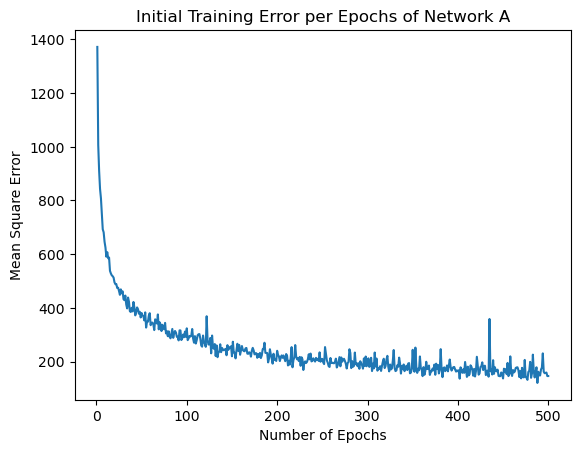

In [159]:
y = sqr_error_per_epoch_init
x = epoch_1_init

plt.plot(x, y)
plt.title("Initial Training Error per Epochs of Network A")
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Square Error")
plt.show()

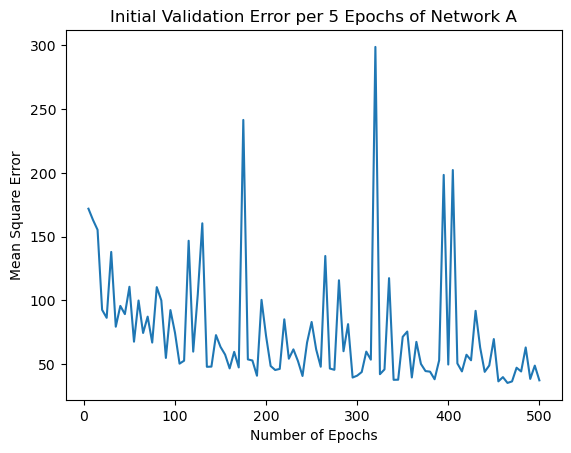

In [160]:
y = sqr_error_per_xepoch_val_init
x = epoch_x_init

plt.plot(x, y)
plt.title("Initial Validation Error per 5 Epochs of Network A")
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Square Error")
plt.show()

##### Evaluation Metrics

In [29]:
predicted_train_init = dict_predicted_train_init['epoch_'+str(epochs)]
predicted_val_init = dict_predicted_val_init['epoch_'+str(epochs)]
true_train_init = dict_true_train_init['epoch_'+str(epochs)]
true_val_init = dict_true_val_init['epoch_'+str(epochs)]

accuracy_train_init = accuracy(predicted_train_init, true_train_init)
accuracy_val_init = accuracy(predicted_val_init, true_val_init)

precision_train_init, recall_train_init, f1_score_train_init, mcc_train_init = multi_class_metric(predicted_train_init, true_train_init)
precision_val_init, recall_val_init, f1_score_val_init, mcc_val_init = multi_class_metric(predicted_val_init, true_val_init)

C:\Users\maryn\AppData\Local\Temp\ipykernel_14484\252485751.py:28: RuntimeWarning: overflow encountered in long_scalars
  mcc_c = (tp*tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
C:\Users\maryn\AppData\Local\Temp\ipykernel_14484\252485751.py:28: RuntimeWarning: invalid value encountered in sqrt
  mcc_c = (tp*tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))


In [178]:
labels = ['Accuracy','Precision', 'Recall', 'F1 Score', 'MCC']
metrics_train_init = [accuracy_train_init, precision_train_init, recall_train_init, f1_score_train_init, mcc_train_init]
metrics_val_init = [accuracy_val_init, precision_val_init, recall_val_init, f1_score_val_init, mcc_val_init]
df_init = pd.DataFrame({'Performance Metrics': labels, 'Initial Training Performance for Network A': np.round(metrics_train_init,4), 'Initial Validation Performance for Network A': np.round(metrics_val_init,4)})

conf_train_init = confusion_matrix(predicted_train_init, true_train_init)
conf_val_init = confusion_matrix(predicted_val_init, true_val_init)

print(f'Time Interval:{timediff_init}')
display(df_init)

print('Initial Training Confusion Matrix of Network A')
display(conf_train_init)
print('Initial Validation Confusion Matrix of Network A')
display(conf_val_init)

Time Interval:258.0729892253876


,Performance Metrics,Initial Training Performance for Network A,Initial Validation Performance for Network A
0,Accuracy,0.9438,0.9412
1,Precision,0.9440,0.9419
2,Recall,0.9431,0.9435
3,F1 Score,0.9430,0.9416
4,MCC,32.4817,2.4994


Initial Training Confusion Matrix of Network A


[[388, 3, 2, 1, 0, 3, 2, 7],
 [4, 389, 3, 0, 0, 15, 0, 1],
 [0, 0, 406, 0, 0, 0, 0, 0],
 [3, 0, 0, 383, 0, 4, 0, 8],
 [1, 1, 0, 0, 402, 0, 4, 0],
 [14, 3, 1, 3, 1, 353, 1, 13],
 [1, 0, 0, 0, 4, 6, 379, 1],
 [25, 6, 7, 6, 1, 24, 1, 320]]

Initial Validation Confusion Matrix of Network A


[[88, 0, 0, 1, 0, 1, 1, 3],
 [3, 81, 0, 0, 0, 4, 0, 0],
 [0, 0, 94, 0, 0, 0, 0, 0],
 [0, 0, 0, 101, 0, 0, 0, 1],
 [0, 0, 0, 0, 92, 0, 0, 0],
 [7, 1, 1, 1, 0, 100, 0, 1],
 [0, 0, 0, 0, 0, 0, 109, 0],
 [4, 4, 4, 1, 1, 6, 2, 88]]

In [35]:
df_init.to_csv('initial_networkA_performancemetrics.csv', index = False)
np.savetxt('initial_networkA_confusionmatrix_train.csv', conf_train_init)
np.savetxt('initial_networkA_confusionmatrix_valid.csv', conf_val_init)

### Optimizing Parameters of Network A

#### Changing Number of Nodes

Number of nodes at 1st hidden layer

In [37]:
node = np.linspace(1, 10, 10) 
node_cons = 5
momentum = 0.9
learning_rate = 0.5
epochs = 300

mselist_1 = []
timedifflist_1 = []

for node1 in node:
    node2 = node_cons
    network = networkA_change_nodes(dim_in, dim_out, int(node1), node2)
    mse, timediff = modifiable_train_mlp(network, train, test, momentum, learning_rate, epochs, 5)
    
    mselist_1.append(mse)
    timedifflist_1.append(timediff)

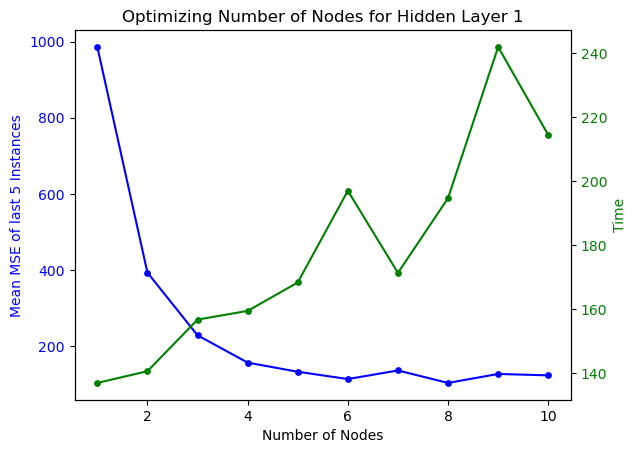

In [129]:
x = node
y_mse = mselist_1
y_time = timedifflist_1

fig, ax1 = plt.subplots()
ax1.set_xlabel('Number of Nodes')
ax1.set_ylabel('Mean MSE of last 5 Instances', color='blue')
ax1.scatter(x, y_mse, color='blue', s=15)
ax1.plot(x, y_mse, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Time', color='green')
ax2.scatter(x, y_time, color='green', s=15)
ax2.plot(x, y_time, color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Optimizing Number of Nodes for Hidden Layer 1')
plt.show()

In [173]:
df_node1 = pd.DataFrame({"number of nodes at 1st hidden layer": np.round(node,3), "mean mse of last 5 iters": np.round(mselist_1,2), "training time": np.round(timedifflist_1,2)})
display(df_node1)

,number of nodes at 1st hidden layer,mean mse of last 5 iters,training time
0,1.0,985.91,136.90
1,2.0,393.69,140.56
2,3.0,229.17,156.71
3,4.0,157.59,159.42
4,5.0,133.55,168.31
5,6.0,114.43,197.01
6,7.0,136.92,171.32
7,8.0,104.25,194.70
8,9.0,127.76,242.00
9,10.0,124.10,214.47


Number of nodes at 2nd hidden layer

In [40]:
node = np.linspace(1, 10, 10) 
node_cons = 5
momentum = 0.9
learning_rate = 0.5
epochs = 300

mselist_2 = []
timedifflist_2 = []

for node2 in node:
    node1 = node_cons
    network = networkA_change_nodes(dim_in, dim_out, node1, int(node2))
    mse, timediff = modifiable_train_mlp(network, train, test, momentum, learning_rate, epochs, 5)
    
    mselist_2.append(mse)
    timedifflist_2.append(timediff)

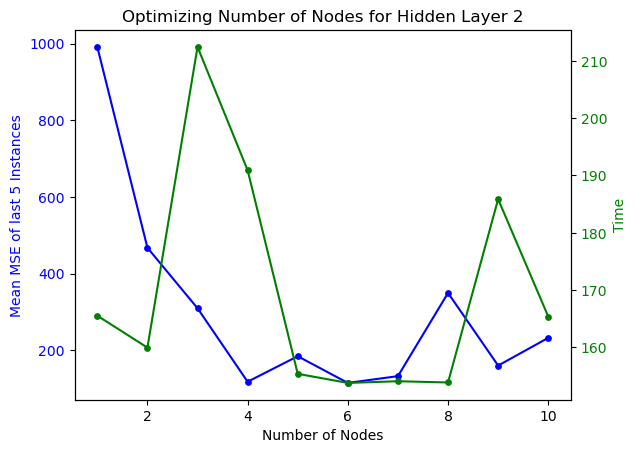

In [130]:
x = node
y_mse = mselist_2
y_time = timedifflist_2

fig, ax1 = plt.subplots()
ax1.set_xlabel('Number of Nodes')
ax1.set_ylabel('Mean MSE of last 5 Instances', color='blue')
ax1.scatter(x, y_mse, color='blue', s=15)
ax1.plot(x, y_mse, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Time', color='green')
ax2.scatter(x, y_time, color='green', s=15)
ax2.plot(x, y_time, color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Optimizing Number of Nodes for Hidden Layer 2')
plt.show()

In [172]:
df_node2 = pd.DataFrame({"number of nodes at 2nd hidden layer": np.round(node), "mean mse of last 5 iters": np.round(mselist_2,2), "training time": np.round(timedifflist_2,2)})
display(df_node2)

,number of nodes at 2nd hidden layer,mean mse of last 5 iters,training time
0,1.0,991.30,165.53
1,2.0,467.36,159.96
2,3.0,309.49,212.44
3,4.0,117.74,190.92
4,5.0,184.30,155.39
5,6.0,114.66,153.80
6,7.0,132.38,154.09
7,8.0,349.42,153.88
8,9.0,159.95,185.87
9,10.0,232.19,165.39


Number of nodes at 1st and 2nd hidden layer

In [43]:
node = np.linspace(1, 10, 10) 
node_cons = 5
momentum = 0.9
learning_rate = 0.5
epochs = 300

mselist_3 = []
timedifflist_3 = []

for node2 in node:
    node1 = node2
    network = networkA_change_nodes(dim_in, dim_out, int(node1), int(node2))
    mse, timediff = modifiable_train_mlp(network, train, test, momentum, learning_rate, epochs, 5)
    
    mselist_3.append(mse)
    timedifflist_3.append(timediff)

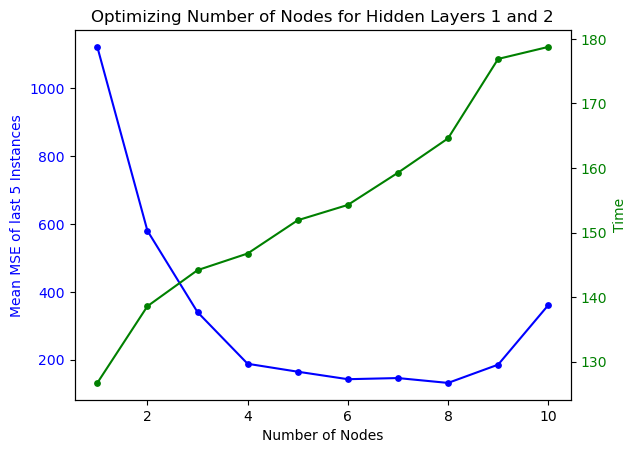

In [132]:
x = node
y_mse = mselist_3
y_time = timedifflist_3

fig, ax1 = plt.subplots()
ax1.set_xlabel('Number of Nodes')
ax1.set_ylabel('Mean MSE of last 5 Instances', color='blue')
ax1.scatter(x, y_mse, color='blue', s=15)
ax1.plot(x, y_mse, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Time', color='green')
ax2.scatter(x, y_time, color='green', s=15)
ax2.plot(x, y_time, color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Optimizing Number of Nodes for Hidden Layers 1 and 2')
plt.show()

In [101]:
df_node3 = pd.DataFrame({"number of nodes at both hidden layers": np.round(node,2), "mean mse of last 5 iters": np.round(mselist_3,2), "training time": np.round(timedifflist_3,2)})
display(df_node3)

,number of nodes at both hidden layers,mean mse of last 5 iters,training time
0,1.0,1122.23,126.71
1,2.0,580.08,138.59
2,3.0,340.08,144.18
3,4.0,187.78,146.75
4,5.0,164.41,151.91
5,6.0,142.31,154.28
6,7.0,145.68,159.27
7,8.0,131.33,164.59
8,9.0,185.22,176.90
9,10.0,360.58,178.76


#### Changing Momentum

In [46]:
node_cons = 5
momentum_ = np.linspace(0,1.5,20)
learning_rate = 0.5
epochs = 300

mselist_mm = []
timedifflist_mm = []

for mm in momentum_:
    node1 = node_cons
    node2 = node_cons
    momentum = mm
    network = networkA_change_nodes(dim_in, dim_out, int(node1), int(node2))
    mse, timediff = modifiable_train_mlp(network, train, test, momentum, learning_rate, epochs, 5)

    mselist_mm.append(mse)
    timedifflist_mm.append(timediff)

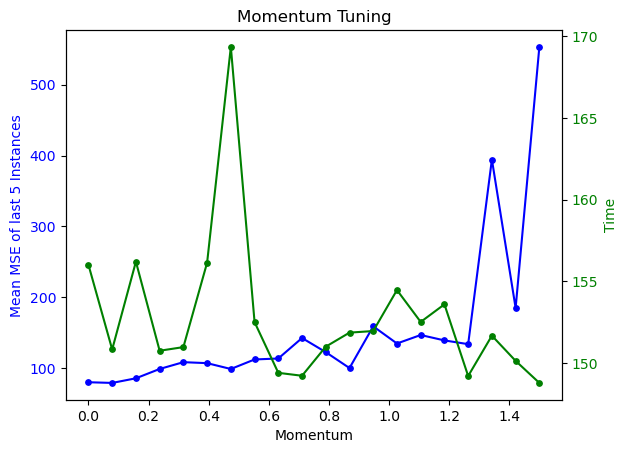

In [134]:
x = momentum_
y_mse = mselist_mm
y_time = timedifflist_mm

fig, ax1 = plt.subplots()
ax1.set_xlabel('Momentum')
ax1.set_ylabel('Mean MSE of last 5 Instances', color='blue')
ax1.scatter(x, y_mse, color='blue', s=15)
ax1.plot(x, y_mse, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Time', color='green')
ax2.scatter(x, y_time, color='green', s=15)
ax2.plot(x, y_time, color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Momentum Tuning')
plt.show()

In [102]:
df_mm = pd.DataFrame({"momentum": np.round(momentum_,2), "mean mse of last 5 iters": np.round(mselist_mm,2), "training time": np.round(timedifflist_mm,2)})
display(df_mm)

,momentum,mean mse of last 5 iters,training time
0,0.00,79.74,156.02
1,0.08,78.77,150.83
2,0.16,85.32,156.21
3,0.24,98.49,150.75
4,0.32,108.10,150.97
5,0.39,106.71,156.14
6,0.47,98.46,169.36
7,0.55,111.91,152.50
8,0.63,113.28,149.40
9,0.71,142.23,149.22


#### Changing Learning Rate

In [49]:
node_cons = 5
momentum = 0.9 
learning_rate_ = np.linspace(0.01, 0.5, 20) 
epochs = 300

mselist_lr = []
timedifflist_lr = []


for lr in learning_rate_:
    node1 = node_cons
    node2 = node_cons
    learning_rate = lr
    
    network = networkA_change_nodes(dim_in, dim_out, int(node1), int(node2))
    mse, timediff = modifiable_train_mlp(network, train, test, momentum, learning_rate, epochs, 5)

    mselist_lr.append(mse)
    timedifflist_lr.append(timediff)

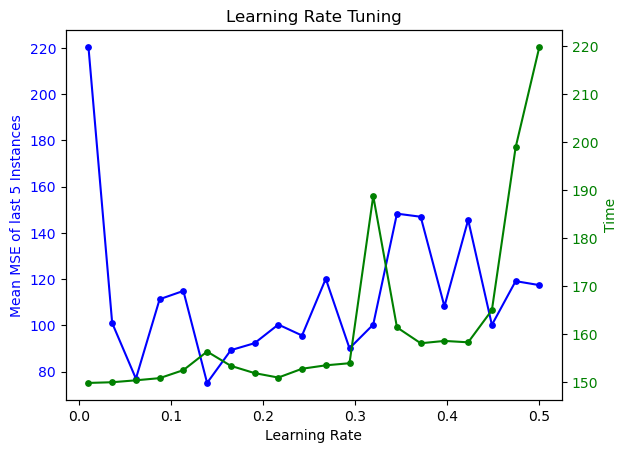

In [135]:
x = learning_rate_
y_mse = mselist_lr
y_time = timedifflist_lr

fig, ax1 = plt.subplots()
ax1.set_xlabel('Learning Rate')
ax1.set_ylabel('Mean MSE of last 5 Instances', color='blue')
ax1.scatter(x, y_mse, color='blue', s=15)
ax1.plot(x, y_mse, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Time', color='green')
ax2.scatter(x, y_time, color='green', s=15)
ax2.plot(x, y_time, color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Learning Rate Tuning')
plt.show()

In [137]:
df_lr = pd.DataFrame({"learning rate": np.round(learning_rate_,2), "mean mse of last 5 iters": np.round(mselist_lr,2), "training time": np.round(timedifflist_lr,2)})
display(df_lr)

,learning rate,mean mse of last 5 iters,training time
0,0.01,220.41,149.78
1,0.04,100.98,149.92
2,0.06,76.92,150.33
3,0.09,111.28,150.78
4,0.11,114.87,152.45
5,0.14,75.07,156.32
6,0.16,89.24,153.34
7,0.19,92.26,151.83
8,0.22,100.32,150.90
9,0.24,95.57,152.74


#### Changing Epochs

In [52]:
node_cons = 5
momentum = 0.9
learning_rate = 0.5
epochs_ = np.linspace(50,550,10)

mselist_ep = []
timedifflist_ep = []

for ep in epochs_:
    node1 = node_cons
    node2 = node_cons
    epochs = int(ep)
    
    network = networkA_change_nodes(dim_in, dim_out, int(node1), int(node2))
    mse, timediff = modifiable_train_mlp(network, train, test, momentum, learning_rate, epochs, 5)

    mselist_ep.append(mse)
    timedifflist_ep.append(timediff)

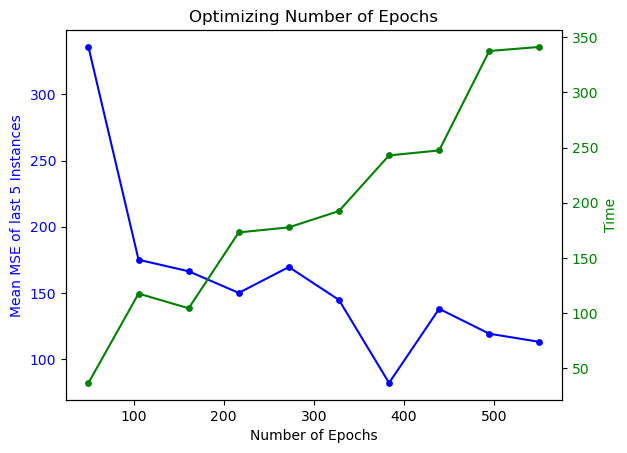

In [136]:
x = epochs_
y_mse = mselist_ep
y_time = timedifflist_ep

fig, ax1 = plt.subplots()
ax1.set_xlabel('Number of Epochs')
ax1.set_ylabel('Mean MSE of last 5 Instances', color='blue')
ax1.scatter(x, y_mse, color='blue', s=15)
ax1.plot(x, y_mse, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Time', color='green')
ax2.scatter(x, y_time, color='green', s=15)
ax2.plot(x, y_time, color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Optimizing Number of Epochs')
plt.show()

In [104]:
df_ep = pd.DataFrame({"number of epochs": np.round(epochs_,2), "mean mse of last 5 iters": np.round(mselist_ep,2), "training time": np.round(timedifflist_ep,2)})
display(df_ep)

,number of epochs,mean mse of last 5 iters,training time
0,50.00,335.77,36.55
1,105.56,175.06,117.57
2,161.11,166.38,104.25
3,216.67,150.05,173.07
4,272.22,169.58,177.65
5,327.78,144.74,192.46
6,383.33,82.07,242.92
7,438.89,138.03,247.43
8,494.44,119.24,337.61
9,550.00,113.09,341.31


### Evaluation Metrics Functions

### Optimized Parameters

In [138]:
momentum = 0.7
learning_rate = 0.14
epochs = 400
nodes = 5

### Optimized Training of Network A

In [139]:
network = networkA_change_nodes(dim_in, dim_out, nodes, nodes)

tic = time.time()
upd_dict_network_upA, val_dict_network_upA, dict_predicted_train_upA, dict_predicted_val_upA, dict_true_train_upA, dict_true_val_upA, sqr_error_per_epoch_upA, sqr_error_per_xepoch_train_upA, sqr_error_per_xepoch_val_upA, epoch_1_upA, epoch_x_upA = train_mlp(network, train, test, momentum, learning_rate, epochs)
toc = time.time()
timediff_upA = toc - tic

In [140]:
keys = ['activation', 'activation_params', 'weight', 'bias']
dict_network_upA = [{key: dicti[key] for key in keys if key in dicti} for dicti in upd_dict_network_init]

with open("dict_network_init.txt", "w") as f:
    f.write(str(dict_network_upA))

##### Plots

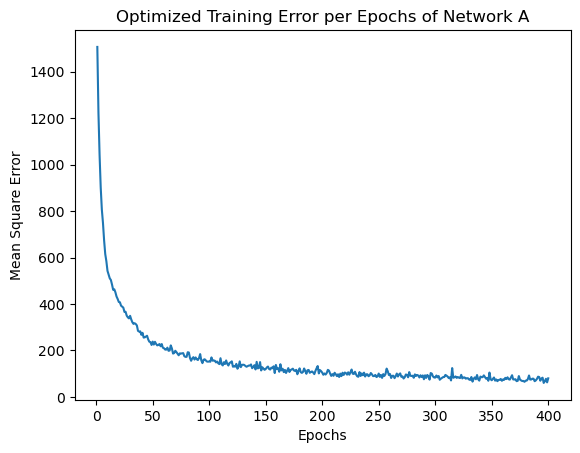

In [141]:
y = sqr_error_per_epoch_upA
x = epoch_1_upA

plt.plot(x, y)
plt.title("Optimized Training Error per Epochs of Network A")
plt.xlabel("Epochs")
plt.ylabel("Mean Square Error")
plt.show()

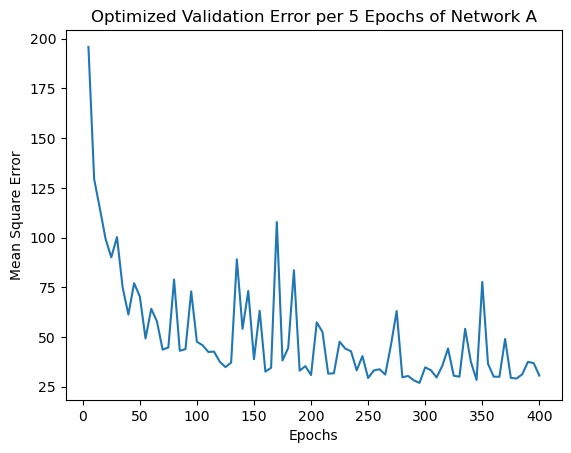

In [142]:
y = sqr_error_per_xepoch_val_upA
x = epoch_x_upA

plt.plot(x, y)
plt.title("Optimized Validation Error per 5 Epochs of Network A")
plt.xlabel("Epochs")
plt.ylabel("Mean Square Error")
plt.show()

##### Metrics

In [174]:
predicted_train_upA = dict_predicted_train_upA['epoch_'+str(epochs)]
predicted_val_upA = dict_predicted_val_upA['epoch_'+str(epochs)]
true_train_upA = dict_true_train_upA['epoch_'+str(epochs)]
true_val_upA = dict_true_val_upA['epoch_'+str(epochs)]

accuracy_train_upA = accuracy(predicted_train_upA, true_train_upA)
accuracy_val_upA = accuracy(predicted_val_upA, true_val_upA)

precision_train_upA, recall_train_upA, f1_score_train_upA, mcc_train_upA = multi_class_metric(predicted_train_upA, true_train_upA)
precision_val_upA, recall_val_upA, f1_score_val_upA, mcc_val_upA = multi_class_metric(predicted_val_upA, true_val_upA)

labels = ['Accuracy','Precision', 'Recall', 'F1 Score', 'MCC']
metrics_train_upA = [accuracy_train_upA, precision_train_upA, recall_train_upA, f1_score_train_upA, mcc_train_upA]

metrics_val_upA = [accuracy_val_upA, precision_val_upA, recall_val_upA, f1_score_val_upA, mcc_val_upA]
df_upA = pd.DataFrame({'Performance Metrics': labels, 'Optimized Training Results for Network A': np.round(metrics_train_upA,4), 'Optimized Validation Results for Network A': np.round(metrics_val_upA,4)})

conf_train_upA = confusion_matrix(predicted_train_upA, true_train_upA)
conf_val_upA = confusion_matrix(predicted_val_upA, true_val_upA)

print(f'Time Interval:{timediff_upA}')
display(df_upA)

print('Optimized Training Confusion Matrix of Network A')
display(conf_train_upA)
print('Optimized Validation Confusion Matrix of Network A')
display(conf_val_upA)

Time Interval:439.7893531322479


C:\Users\maryn\AppData\Local\Temp\ipykernel_14484\252485751.py:28: RuntimeWarning: overflow encountered in long_scalars
  mcc_c = (tp*tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
C:\Users\maryn\AppData\Local\Temp\ipykernel_14484\252485751.py:28: RuntimeWarning: invalid value encountered in sqrt
  mcc_c = (tp*tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))


,Performance Metrics,Optimized Training Results for Network A,Optimized Validation Results for Network A
0,Accuracy,0.9656,0.9438
1,Precision,0.9669,0.9461
2,Recall,0.9651,0.9469
3,F1 Score,0.9653,0.9448
4,MCC,42.2716,3.1253


Optimized Training Confusion Matrix of Network A


[[400, 2, 1, 0, 0, 2, 1, 0],
 [6, 402, 1, 0, 0, 1, 1, 1],
 [2, 1, 403, 0, 0, 0, 0, 0],
 [3, 0, 0, 389, 0, 0, 0, 6],
 [0, 0, 0, 0, 408, 0, 0, 0],
 [8, 2, 0, 1, 0, 368, 0, 10],
 [7, 0, 0, 0, 0, 1, 383, 0],
 [29, 4, 0, 10, 0, 9, 1, 337]]

Optimized Validation Confusion Matrix of Network A


[[86, 1, 1, 0, 0, 3, 1, 2],
 [0, 88, 0, 0, 0, 0, 0, 0],
 [2, 0, 92, 0, 0, 0, 0, 0],
 [1, 0, 0, 101, 0, 0, 0, 0],
 [0, 0, 0, 0, 92, 0, 0, 0],
 [7, 2, 0, 0, 0, 101, 0, 1],
 [0, 0, 0, 0, 0, 1, 108, 0],
 [12, 1, 0, 4, 1, 5, 0, 87]]

In [144]:
df_upA.to_csv('optimized_networkA_performancemetrics.csv', index = False)
np.savetxt('optimized_networkA_confusionmatrix_train.csv', conf_train_upA)
np.savetxt('optimized_networkA_confusionmatrix_valid.csv', conf_val_upA)

### Optimized Training of Network B

In [145]:
network = networkB_change_nodes(dim_in, dim_out, 5, 5)

tic = time.time()
upd_dict_network_upB, val_dict_network_upB, dict_predicted_train_upB, dict_predicted_val_upB, dict_true_train_upB, dict_true_val_upB, sqr_error_per_epoch_upB, sqr_error_per_xepoch_train_upB, sqr_error_per_xepoch_val_upB, epoch_1_upB, epoch_x_upB = train_mlp(network, train, test, momentum, learning_rate, epochs)
toc = time.time()
timediff_upB = toc - tic

C:\Users\maryn\AppData\Local\Temp\ipykernel_14484\4145684639.py:29: RuntimeWarning: overflow encountered in exp
  curr_in = 1 / (1 + np.exp(-a*v))


In [146]:
keys = ['activation', 'activation_params', 'weight', 'bias']
dict_network_upB = [{key: dicti[key] for key in keys if key in dicti} for dicti in upd_dict_network_init]

with open("dict_network_upB.txt", "w") as f:
    f.write(str(dict_network_upB))

##### Plots

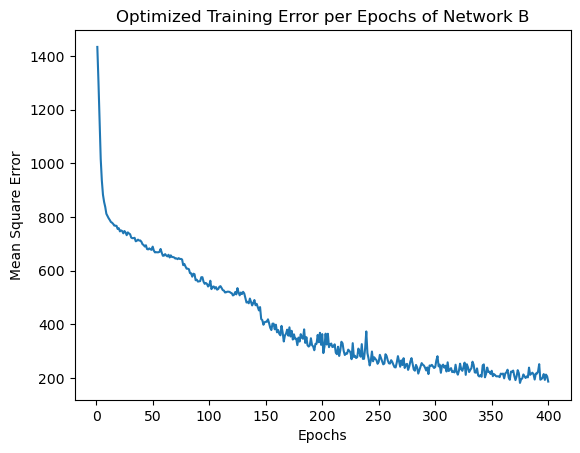

In [147]:
y = sqr_error_per_epoch_upB
x = epoch_1_upB

plt.plot(x, y)
plt.title("Optimized Training Error per Epochs of Network B")
plt.xlabel("Epochs")
plt.ylabel("Mean Square Error")
plt.show()

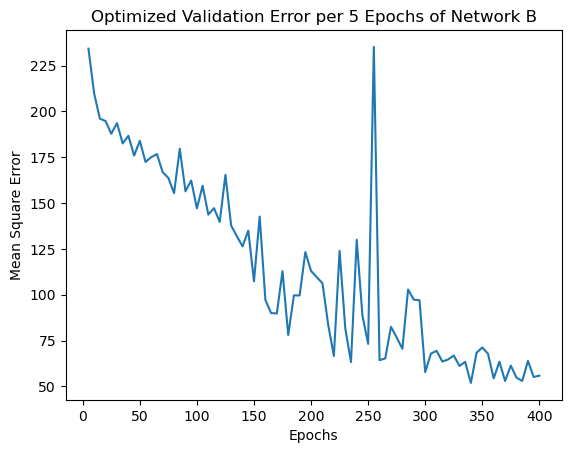

In [148]:
y = sqr_error_per_xepoch_val_upB
x = epoch_x_upB

plt.plot(x, y)
plt.title("Optimized Validation Error per 5 Epochs of Network B")
plt.xlabel("Epochs")
plt.ylabel("Mean Square Error")
plt.show()

##### Metrics

In [165]:
predicted_train_upB = dict_predicted_train_upB['epoch_'+str(epochs)]
predicted_val_upB = dict_predicted_val_upB['epoch_'+str(epochs)]
true_train_upB = dict_true_train_upB['epoch_'+str(epochs)]
true_val_upB = dict_true_val_upB['epoch_'+str(epochs)]

accuracy_train_upB = accuracy(predicted_train_upB, true_train_upB)
accuracy_val_upB = accuracy(predicted_val_upB, true_val_upB)

precision_train_upB, recall_train_upB, f1_score_train_upB, mcc_train_upB = multi_class_metric(predicted_train_upB, true_train_upB)
precision_val_upB, recall_val_upB, f1_score_val_upB, mcc_val_upB = multi_class_metric(predicted_val_upB, true_val_upB)

labels = ['Accuracy','Precision', 'Recall', 'F1 Score', 'MCC']
metrics_train_upB = [accuracy_train_upB, precision_train_upB, recall_train_upB, f1_score_train_upB, mcc_train_upB]
metrics_val_upB = [accuracy_val_upB, precision_val_upB, recall_val_upB, f1_score_val_upB, mcc_val_upB]
df_upB = pd.DataFrame({'Performance Metrics': labels, 'Optimized Training Results for Network B': np.round(metrics_train_upB,4), 'Optimized Validation Results for Network B': np.round(metrics_val_upB,4)})

conf_train_upB = confusion_matrix(predicted_train_upB, true_train_upB)
conf_val_upB = confusion_matrix(predicted_val_upB, true_val_upB)

print(f'Time Interval:{timediff_upB}')
display(df_upB)

print('Optimized Training Confusion Matrix of Network B')
display(conf_train_upB)
print('Optimized Validation Confusion Matrix of Network B')
display(conf_val_upB)

Time Interval:441.96668434143066


C:\Users\maryn\AppData\Local\Temp\ipykernel_14484\252485751.py:28: RuntimeWarning: overflow encountered in long_scalars
  mcc_c = (tp*tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
C:\Users\maryn\AppData\Local\Temp\ipykernel_14484\252485751.py:28: RuntimeWarning: invalid value encountered in sqrt
  mcc_c = (tp*tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))


,Performance Metrics,Optimized Training Results for Network B,Optimized Validation Results for Network B
0,Accuracy,0.9109,0.8900
1,Precision,0.9202,0.9068
2,Recall,0.9095,0.8978
3,F1 Score,0.9108,0.8925
4,MCC,41.1713,3.0554


Optimized Training Confusion Matrix of Network B


[[391, 0, 4, 2, 0, 1, 4, 4],
 [14, 388, 5, 0, 0, 4, 0, 1],
 [3, 1, 401, 0, 0, 0, 0, 1],
 [11, 0, 0, 379, 0, 0, 0, 8],
 [8, 0, 0, 0, 398, 0, 2, 0],
 [49, 4, 0, 7, 9, 300, 10, 10],
 [24, 0, 0, 0, 6, 0, 358, 3],
 [46, 2, 4, 14, 1, 19, 4, 300]]

Optimized Validation Confusion Matrix of Network B


[[92, 0, 2, 0, 0, 0, 0, 0],
 [2, 84, 0, 0, 0, 1, 0, 1],
 [0, 0, 94, 0, 0, 0, 0, 0],
 [5, 0, 0, 92, 0, 0, 0, 5],
 [1, 0, 0, 0, 91, 0, 0, 0],
 [30, 1, 0, 0, 3, 68, 3, 6],
 [1, 0, 0, 0, 0, 0, 108, 0],
 [12, 1, 1, 6, 2, 2, 3, 83]]

In [150]:
df_upB.to_csv('optimized_networkB_performancemetrics.csv', index = False)
np.savetxt('optimized_networkB_confusionmatrix_train.csv', conf_train_upB)
np.savetxt('optimized_networkB_confusionmatrix_valid.csv', conf_val_upB)

### Comparison of Initial and Optimized Network A

##### Plot

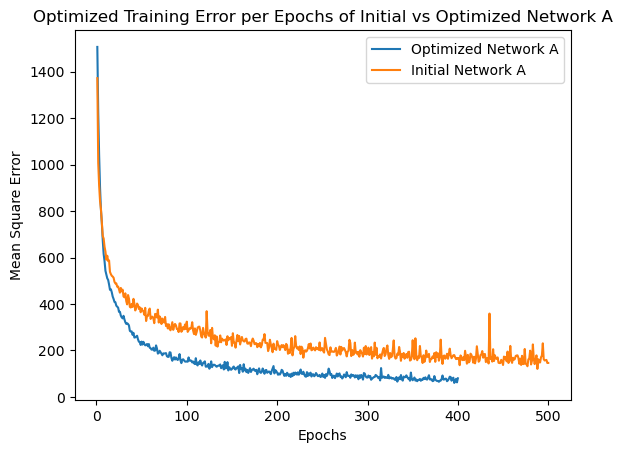

In [187]:
yA = sqr_error_per_epoch_upA
init = sqr_error_per_epoch_init
xA = epoch_1_upA
xinit = epoch_1_init

plt.plot(xA, yA, label = 'Optimized Network A')
plt.plot(xinit, init, label = 'Initial Network A')
plt.title("Optimized Training Error per Epochs of Initial vs Optimized Network A")
plt.xlabel("Epochs")
plt.ylabel("Mean Square Error")
plt.legend()
plt.show()

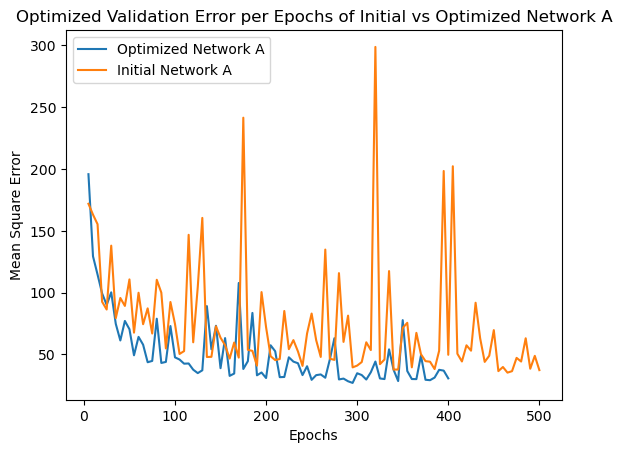

In [188]:
yA = sqr_error_per_xepoch_val_upA
init = sqr_error_per_xepoch_val_init
xA = epoch_x_upA
xinit = epoch_x_init

plt.plot(xA, yA, label = 'Optimized Network A')
plt.plot(xinit, init, label = 'Initial Network A')
plt.title("Optimized Validation Error per Epochs of Initial vs Optimized Network A")
plt.xlabel("Epochs")
plt.ylabel("Mean Square Error")
plt.legend()
plt.show()

In [161]:
print(f'Time Interval of Init Network A:{timediff_init}')
print(f'Time Interval of Optimized Network A:{timediff_upA}')

Time Interval of Network A:258.0729892253876
Time Interval of Network B:439.7893531322479


In [179]:
print('Performance Evaluation for Network A')
display(df_init)
print('Performance Evaluation for Network B')
display(df_upA)

Performance Evaluation for Network A


,Performance Metrics,Initial Training Performance for Network A,Initial Validation Performance for Network A
0,Accuracy,0.9438,0.9412
1,Precision,0.9440,0.9419
2,Recall,0.9431,0.9435
3,F1 Score,0.9430,0.9416
4,MCC,32.4817,2.4994


Performance Evaluation for Network B


,Performance Metrics,Optimized Training Results for Network A,Optimized Validation Results for Network A
0,Accuracy,0.9656,0.9438
1,Precision,0.9669,0.9461
2,Recall,0.9651,0.9469
3,F1 Score,0.9653,0.9448
4,MCC,42.2716,3.1253


In [164]:
print('Optimized Training Confusion Matrix of Network A')
display(conf_train_init)
print('Optimized Training Confusion Matrix of Network B')
display(conf_train_upA)

Optimized Training Confusion Matrix of Network A


[[388, 3, 2, 1, 0, 3, 2, 7],
 [4, 389, 3, 0, 0, 15, 0, 1],
 [0, 0, 406, 0, 0, 0, 0, 0],
 [3, 0, 0, 383, 0, 4, 0, 8],
 [1, 1, 0, 0, 402, 0, 4, 0],
 [14, 3, 1, 3, 1, 353, 1, 13],
 [1, 0, 0, 0, 4, 6, 379, 1],
 [25, 6, 7, 6, 1, 24, 1, 320]]

Optimized Training Confusion Matrix of Network B


[[400, 2, 1, 0, 0, 2, 1, 0],
 [6, 402, 1, 0, 0, 1, 1, 1],
 [2, 1, 403, 0, 0, 0, 0, 0],
 [3, 0, 0, 389, 0, 0, 0, 6],
 [0, 0, 0, 0, 408, 0, 0, 0],
 [8, 2, 0, 1, 0, 368, 0, 10],
 [7, 0, 0, 0, 0, 1, 383, 0],
 [29, 4, 0, 10, 0, 9, 1, 337]]

In [163]:
print('Optimized Validation Confusion Matrix of Network A')
display(conf_val_init)
print('Optimized Validation Confusion Matrix of Network B')
display(conf_val_upA)

Optimized Validation Confusion Matrix of Network A


[[88, 0, 0, 1, 0, 1, 1, 3],
 [3, 81, 0, 0, 0, 4, 0, 0],
 [0, 0, 94, 0, 0, 0, 0, 0],
 [0, 0, 0, 101, 0, 0, 0, 1],
 [0, 0, 0, 0, 92, 0, 0, 0],
 [7, 1, 1, 1, 0, 100, 0, 1],
 [0, 0, 0, 0, 0, 0, 109, 0],
 [4, 4, 4, 1, 1, 6, 2, 88]]

Optimized Validation Confusion Matrix of Network B


[[86, 1, 1, 0, 0, 3, 1, 2],
 [0, 88, 0, 0, 0, 0, 0, 0],
 [2, 0, 92, 0, 0, 0, 0, 0],
 [1, 0, 0, 101, 0, 0, 0, 0],
 [0, 0, 0, 0, 92, 0, 0, 0],
 [7, 2, 0, 0, 0, 101, 0, 1],
 [0, 0, 0, 0, 0, 1, 108, 0],
 [12, 1, 0, 4, 1, 5, 0, 87]]

### Comparison of Network A and Network B

##### Plot

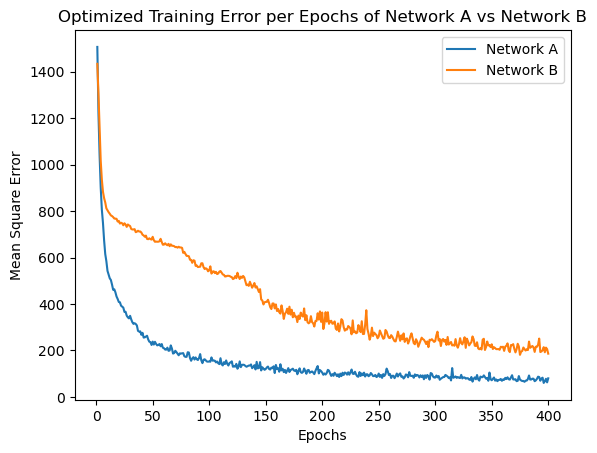

In [151]:
yA = sqr_error_per_epoch_upA
yB = sqr_error_per_epoch_upB
x = epoch_1_upA

plt.plot(x, yA, label = 'Network A')
plt.plot(x, yB, label = 'Network B')
plt.title("Optimized Training Error per Epochs of Network A vs Network B")
plt.xlabel("Epochs")
plt.ylabel("Mean Square Error")
plt.legend()
plt.show()

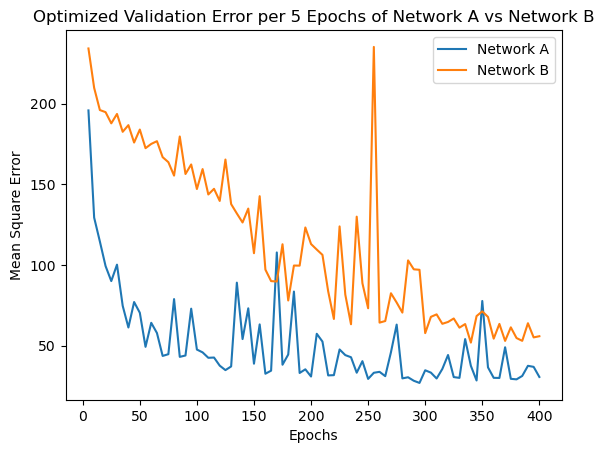

In [152]:
yA = sqr_error_per_xepoch_val_upA
yB = sqr_error_per_xepoch_val_upB
x = epoch_x_upA

plt.plot(x, yA, label = 'Network A')
plt.plot(x, yB, label = 'Network B')
plt.title("Optimized Validation Error per 5 Epochs of Network A vs Network B")
plt.xlabel("Epochs")
plt.ylabel("Mean Square Error")
plt.legend()
plt.show()

##### Metrics

In [153]:
print(f'Time Interval of Network A:{timediff_upA}')
print(f'Time Interval of Network B:{timediff_upB}')

Time Interval of Network A:439.7893531322479
Time Interval of Network B:441.96668434143066


In [176]:
print('Performance Evaluation for Network A')
display(df_upA)
print('Performance Evaluation for Network B')
display(df_upB)

Performance Evaluation for Network A


,Performance Metrics,Optimized Training Results for Network A,Optimized Validation Results for Network A
0,Accuracy,0.9656,0.9438
1,Precision,0.9669,0.9461
2,Recall,0.9651,0.9469
3,F1 Score,0.9653,0.9448
4,MCC,42.2716,3.1253


Performance Evaluation for Network B


,Performance Metrics,Optimized Training Results for Network B,Optimized Validation Results for Network B
0,Accuracy,0.9109,0.8900
1,Precision,0.9202,0.9068
2,Recall,0.9095,0.8978
3,F1 Score,0.9108,0.8925
4,MCC,41.1713,3.0554


In [155]:
print('Optimized Training Confusion Matrix of Network A')
display(conf_train_upA)
print('Optimized Training Confusion Matrix of Network B')
display(conf_train_upB)

Optimized Training Confusion Matrix of Network A


[[400, 2, 1, 0, 0, 2, 1, 0],
 [6, 402, 1, 0, 0, 1, 1, 1],
 [2, 1, 403, 0, 0, 0, 0, 0],
 [3, 0, 0, 389, 0, 0, 0, 6],
 [0, 0, 0, 0, 408, 0, 0, 0],
 [8, 2, 0, 1, 0, 368, 0, 10],
 [7, 0, 0, 0, 0, 1, 383, 0],
 [29, 4, 0, 10, 0, 9, 1, 337]]

Optimized Training Confusion Matrix of Network B


[[391, 0, 4, 2, 0, 1, 4, 4],
 [14, 388, 5, 0, 0, 4, 0, 1],
 [3, 1, 401, 0, 0, 0, 0, 1],
 [11, 0, 0, 379, 0, 0, 0, 8],
 [8, 0, 0, 0, 398, 0, 2, 0],
 [49, 4, 0, 7, 9, 300, 10, 10],
 [24, 0, 0, 0, 6, 0, 358, 3],
 [46, 2, 4, 14, 1, 19, 4, 300]]

In [156]:
print('Optimized Validation Confusion Matrix of Network A')
display(conf_val_upA)
print('Optimized Validation Confusion Matrix of Network B')
display(conf_val_upB)

Optimized Validation Confusion Matrix of Network A


[[86, 1, 1, 0, 0, 3, 1, 2],
 [0, 88, 0, 0, 0, 0, 0, 0],
 [2, 0, 92, 0, 0, 0, 0, 0],
 [1, 0, 0, 101, 0, 0, 0, 0],
 [0, 0, 0, 0, 92, 0, 0, 0],
 [7, 2, 0, 0, 0, 101, 0, 1],
 [0, 0, 0, 0, 0, 1, 108, 0],
 [12, 1, 0, 4, 1, 5, 0, 87]]

Optimized Validation Confusion Matrix of Network B


[[92, 0, 2, 0, 0, 0, 0, 0],
 [2, 84, 0, 0, 0, 1, 0, 1],
 [0, 0, 94, 0, 0, 0, 0, 0],
 [5, 0, 0, 92, 0, 0, 0, 5],
 [1, 0, 0, 0, 91, 0, 0, 0],
 [30, 1, 0, 0, 3, 68, 3, 6],
 [1, 0, 0, 0, 0, 0, 108, 0],
 [12, 1, 1, 6, 2, 2, 3, 83]]

### Network A MLP: Test Set 

In [157]:
dict_network = dict_network_upA
predicted_test_upA = test_mlp(dict_network, arr_test)
np.savetxt('predictions_for_test_tanh.csv', predicted_test_upA)

### Network B MLP: Test Set 

In [158]:
dict_network = dict_network_upB
predicted_test_upB = test_mlp(dict_network, arr_test)
np.savetxt('predictions_for_test_leakyrelu.csv', predicted_test_upB)